# $\bf L_1$ regression

The code balow computes coefficients of L1- and L2-regression functions for given data, and plots these functions.

In [2]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

def l1_regression(x, y):
    """
    Computes L1-regression using linear programming. 

    x:
        An array of x values.
    y: 
        An array of y values.

    Returns:  
        An array [a, b] with coefficients of the L1-regression 
        function f(x) = ax + b. 
    """
    x = np.array(x)
    y = np.array(y)
    c = np.r_[0, 0, np.ones(len(x))]
    A_ub = np.c_[np.r_[x, -x][:, None], 
                 np.r_[np.ones(len(x)), -np.ones(len(x))][:, None],
                 np.r_[-np.eye(len(x)),-np.eye(len(x))]
                ]
    b_ub = np.r_[y, -y]
    res = linprog(c = c, 
                  A_ub = A_ub,
                  b_ub = b_ub,
                  bounds = [(None, None)]*2 + [(0, None)]*len(x), 
                 )
    return res.x[:2]

def l2_regression(x, y):
    """
    Computes L2 (i.e. least squares) regression. 

    x:
        An array of x values.
    y: 
        An array of y values.

    Returns:  
        An array [a, b] with coefficient of the L2-regression 
        function f(x) = ax + b. 
    """
    return np.polyfit(x, y, deg=1)


def plot_regressions(x, y, ylim=None):
    """
    Plots side by side the L1- and L2-regression functions.

    x:
        An array of x values.
    y: 
        An array of y values.
    ylim:
        A tuple with limits of the y-axis. 

    Returns:
       A dictionary with lists of coefficients for L1- 
       and L2-regression functions. 
    """
    plt.figure(figsize = (15, 5))
    l1 = l1_regression(x, y)
    l2 = l2_regression(x, y)
    X = np.r_[x[0] - 1, x[-1] + 1]
    Y = np.c_[X, np.ones(2)]
    plt.subplot(121)
    plt.title(f"$L_1$ regression\n$y = {l1[0]:.2f}x +{l1[1]:.2f}$", size=18)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.plot(X, Y@l1[:, None], 'b-', lw=3) 
    plt.plot(x, y, 'ro', ms=8)
 
    plt.subplot(122)
    plt.title(f"$L_2$ regression\n$y = {l2[0]:.2f}x +{l2[1]:.2f}$", size=18)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.plot(X, Y@l2[:, None], 'b-', lw=3)
    plt.plot(x, y, 'ro', ms=8)
    return {"l1": l1, "l2": l2}

Sample regression plot:

{'l1': array([ 1., -0.]), 'l2': array([0., 2.])}

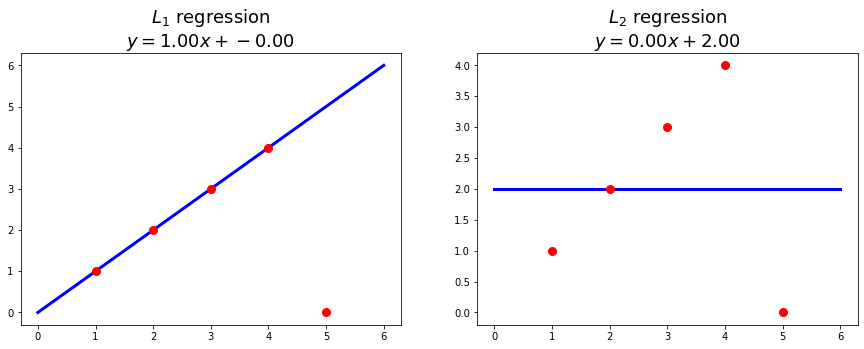

In [3]:
plot_regressions([1, 2, 3, 4, 5], [1, 2, 3, 4, 0])

Here is an interactive widget showing how the L1- and L2-regression functions are changing when we change the regression data:

In [4]:
from ipywidgets import interact, fixed

    
limits = (-20, 20, 2)

def f(a, b, c, d, e):
    plot_regressions([0, 1, 2, 3, 4], [a, b, c, d, e], ylim = (limits[0] - 1, limits[1] + 1))

interact(f, 
        a = limits, 
        b = limits, 
        c = limits, 
        d = limits,
        e = limits,
        continuous_update=False
        );

interactive(children=(IntSlider(value=0, description='a', max=20, min=-20, step=2), IntSlider(value=0, descrip…